In [1]:
import numpy as np
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
flights = pl.read_csv('data/flights.csv')
flights.head(10)

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null
2015,1,1,4,"""DL""",806,"""N3730B""","""SFO""","""MSP""",25,20,-5,18,38,217,230,206,1589,604,6,602,610,8,0,0,null,null,null,null,null,null
2015,1,1,4,"""NK""",612,"""N635NK""","""LAS""","""MSP""",25,19,-6,11,30,181,170,154,1299,504,5,526,509,-17,0,0,null,null,null,null,null,null
2015,1,1,4,"""US""",2013,"""N584UW""","""LAX""","""CLT""",30,44,14,13,57,273,249,228,2125,745,8,803,753,-10,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",1112,"""N3LAAA""","""SFO""","""DFW""",30,19,-11,17,36,195,193,173,1464,529,3,545,532,-13,0,0,null,null,null,null,null,null


In [3]:
X = flights.drop('ARRIVAL_DELAY')
y = flights['ARRIVAL_DELAY']

In [4]:
print(f"Column names: {flights.columns}")
print(f"Number of rows and columns: {flights.shape}")
for column in flights.columns:
    datatype = flights[column].dtype
    print(f"Column: {column}, Data type: {datatype}")

Column names: ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
Number of rows and columns: (5819079, 31)
Column: YEAR, Data type: Int64
Column: MONTH, Data type: Int64
Column: DAY, Data type: Int64
Column: DAY_OF_WEEK, Data type: Int64
Column: AIRLINE, Data type: String
Column: FLIGHT_NUMBER, Data type: Int64
Column: TAIL_NUMBER, Data type: String
Column: ORIGIN_AIRPORT, Data type: String
Column: DESTINATION_AIRPORT, Data type: String
Column: SCHEDULED_DEPARTURE, Data type: Int64
Column: DEPARTURE_TIME, Data type: Int64
Column: DEPARTURE_DELAY, Data type

shape: (9, 2)
┌────────────┬────────────┐
│ statistic  ┆ value      │
│ ---        ┆ ---        │
│ str        ┆ f64        │
╞════════════╪════════════╡
│ count      ┆ 5.714008e6 │
│ null_count ┆ 105071.0   │
│ mean       ┆ 4.407057   │
│ std        ┆ 39.271297  │
│ min        ┆ -87.0      │
│ 25%        ┆ -13.0      │
│ 50%        ┆ -5.0       │
│ 75%        ┆ 8.0        │
│ max        ┆ 1971.0     │
└────────────┴────────────┘


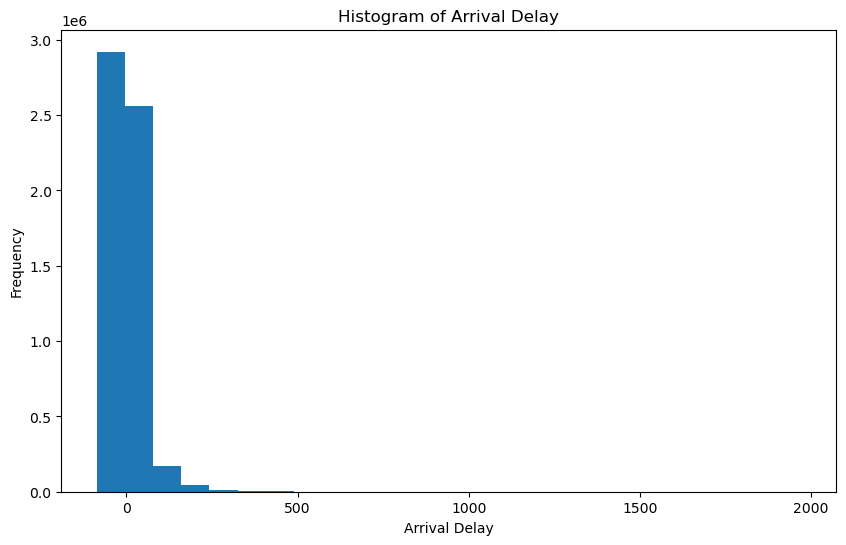

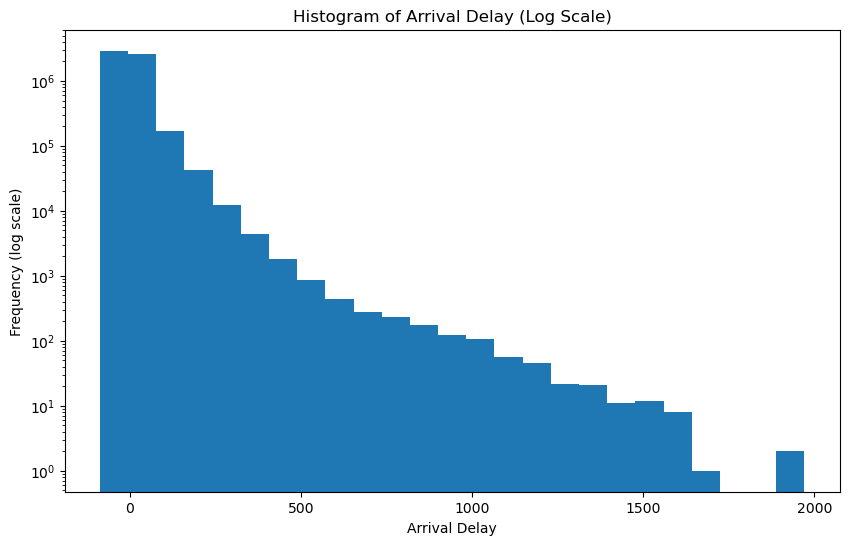

In [5]:
print(y.describe())
# Should I be dropping all rows with nulls? Yes
plt.figure(figsize=(10,6))
plt.hist(y.drop_nulls(), bins=25)
plt.xlabel('Arrival Delay')
plt.ylabel('Frequency')
plt.title('Histogram of Arrival Delay')
plt.show()
# same plot but in log space
plt.figure(figsize=(10,6))
plt.hist(y.drop_nulls(), bins=25, log=True)
plt.xlabel('Arrival Delay')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Arrival Delay (Log Scale)')
plt.show()

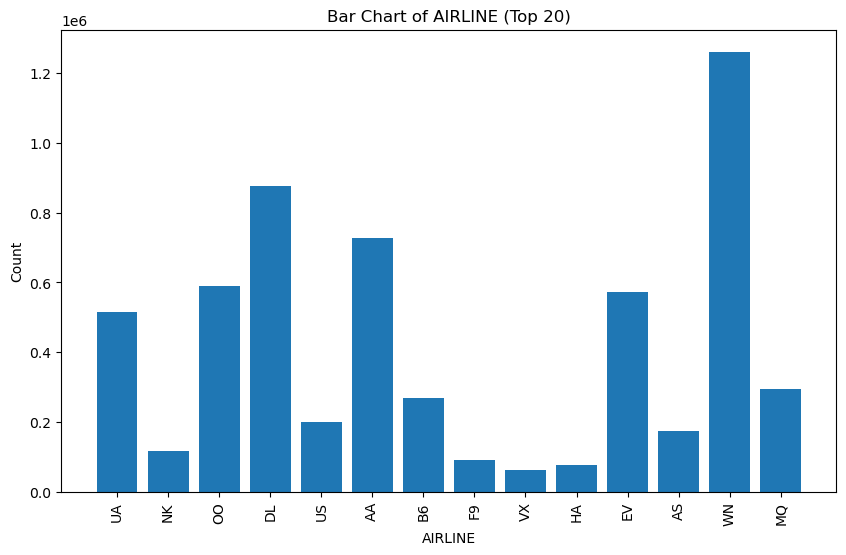

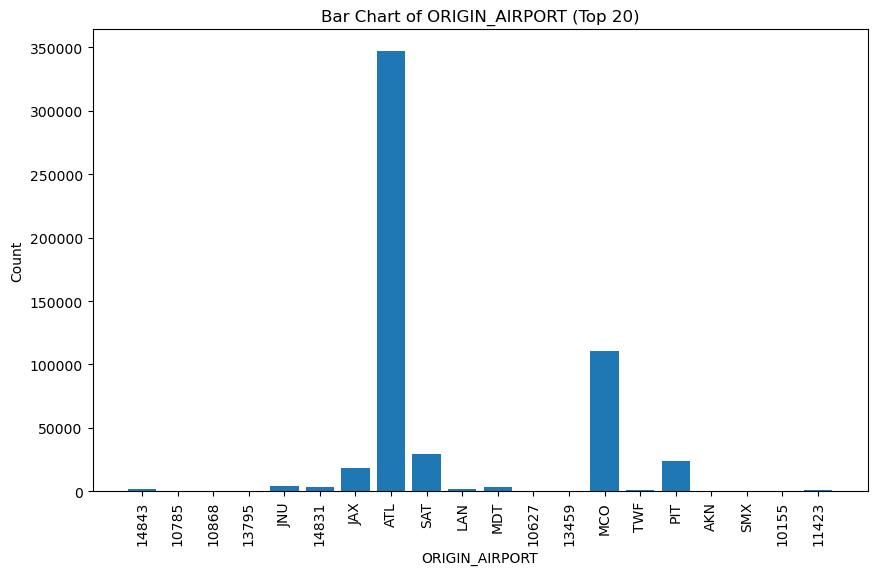

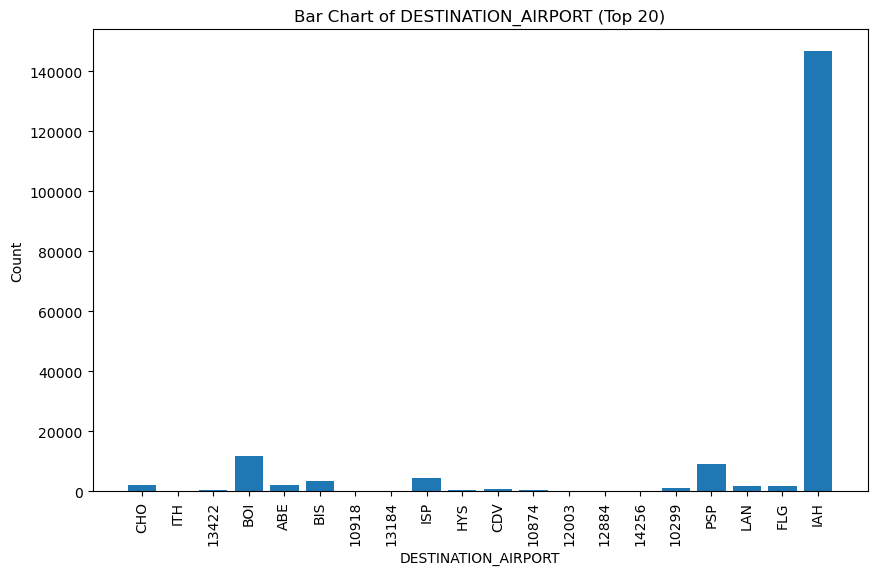

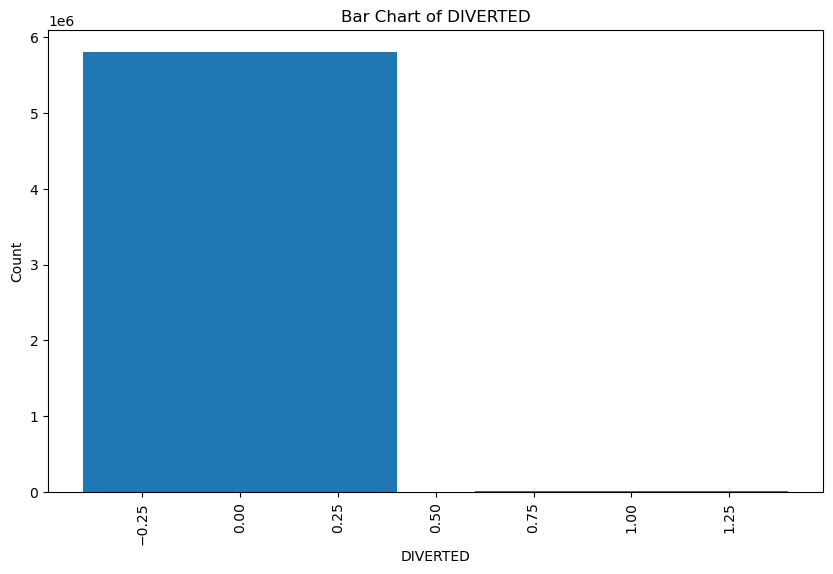

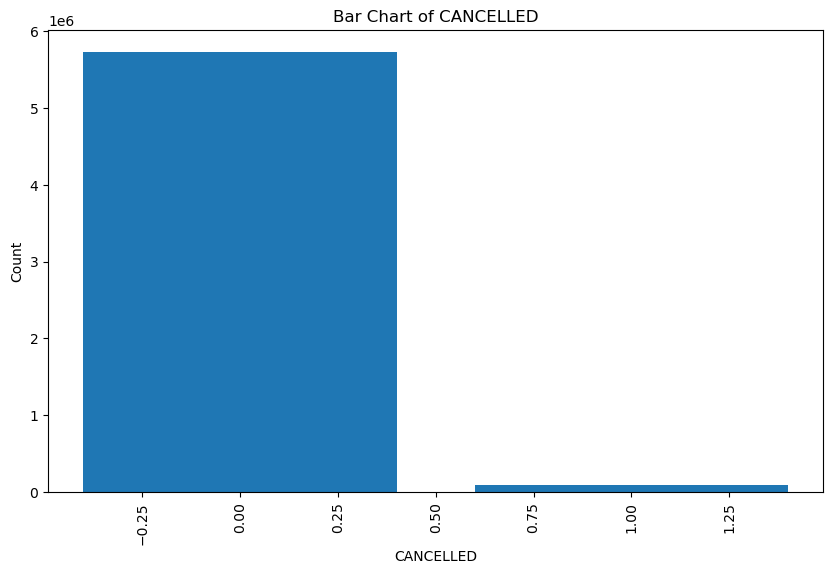

In [6]:
categorical_columns = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DIVERTED', 'CANCELLED']
for column in categorical_columns:
    counts = flights[column].value_counts().head(20) # Sort origin and destination
    plt.figure(figsize=(10,6))
    plt.bar(counts[column], counts['count'])
    if (column == 'DIVERTED' or column == 'CANCELLED'):
        plt.title(f'Bar Chart of {column}')
    else:
        plt.title(f'Bar Chart of {column} (Top 20)')
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.show()

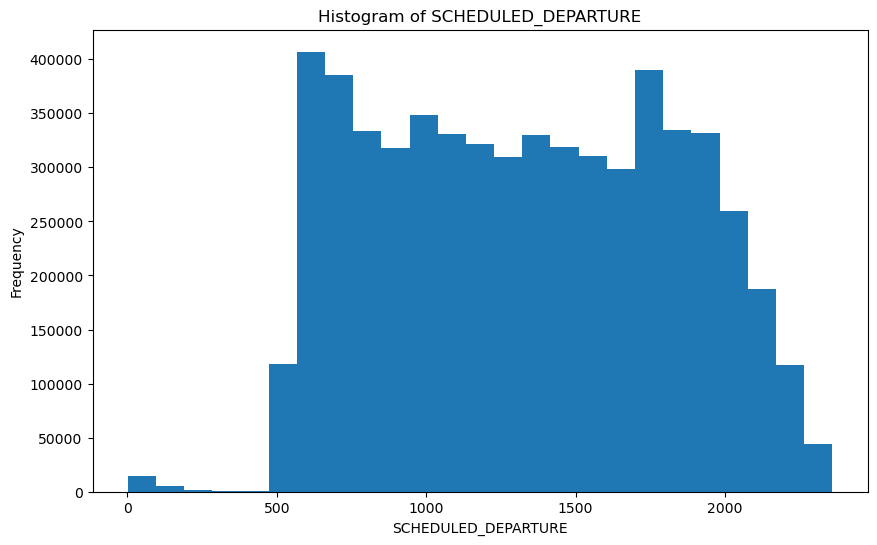

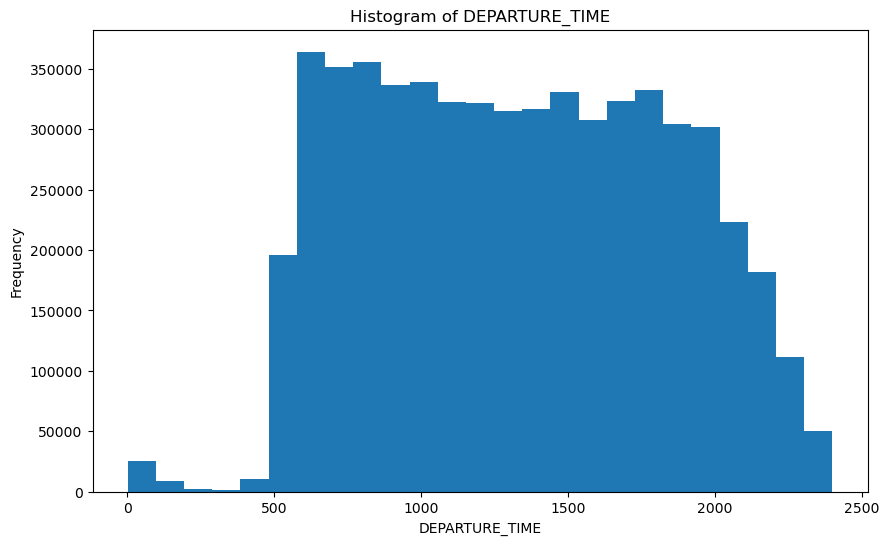

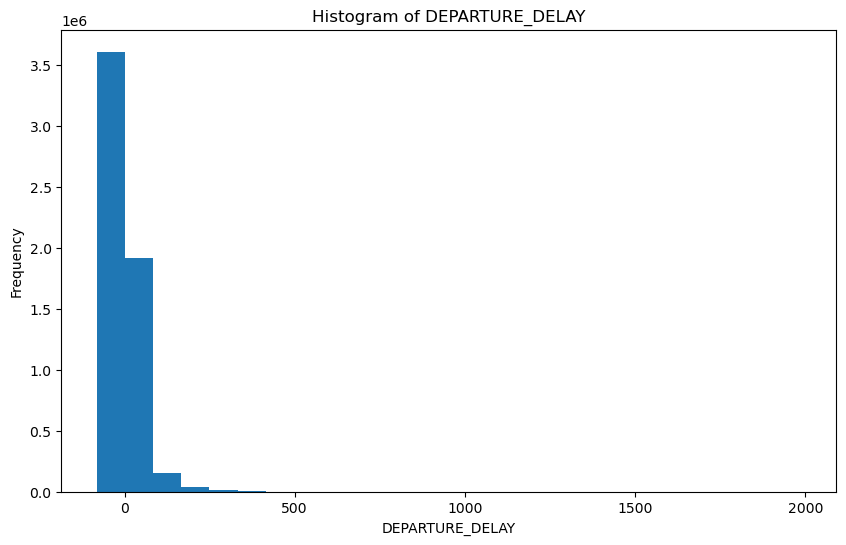

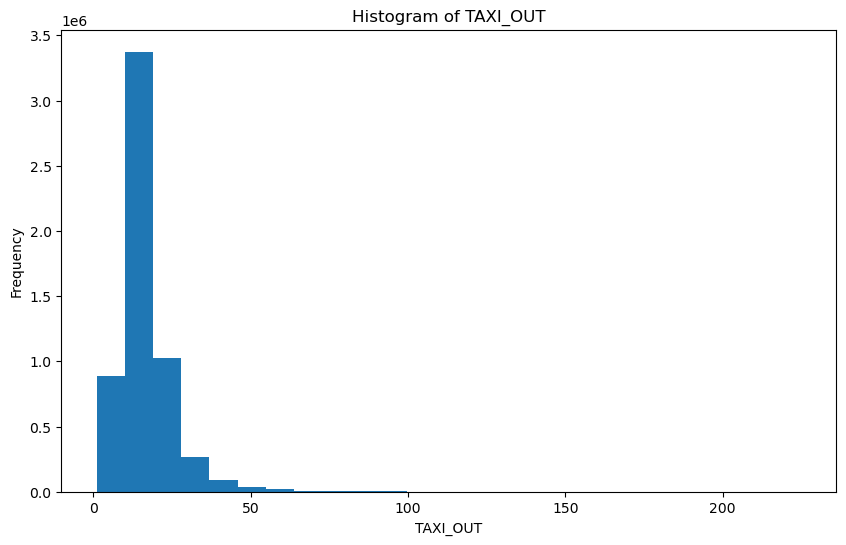

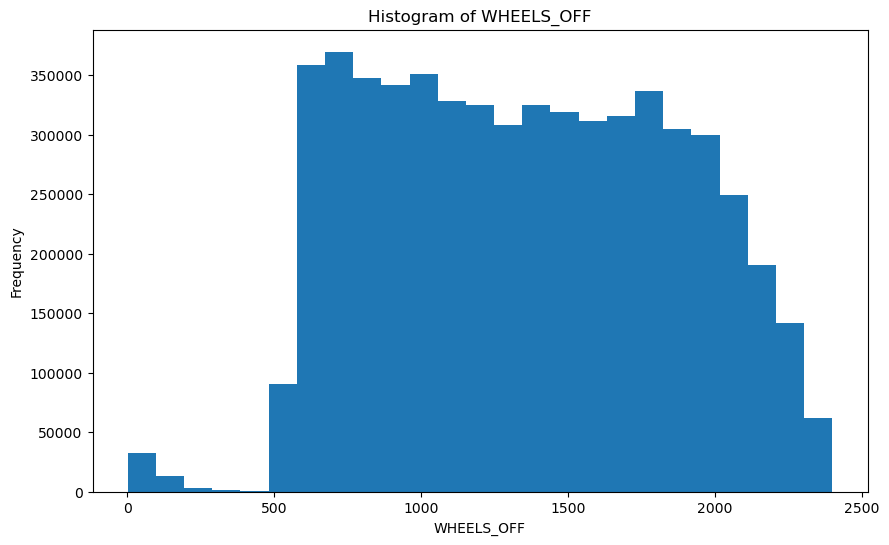

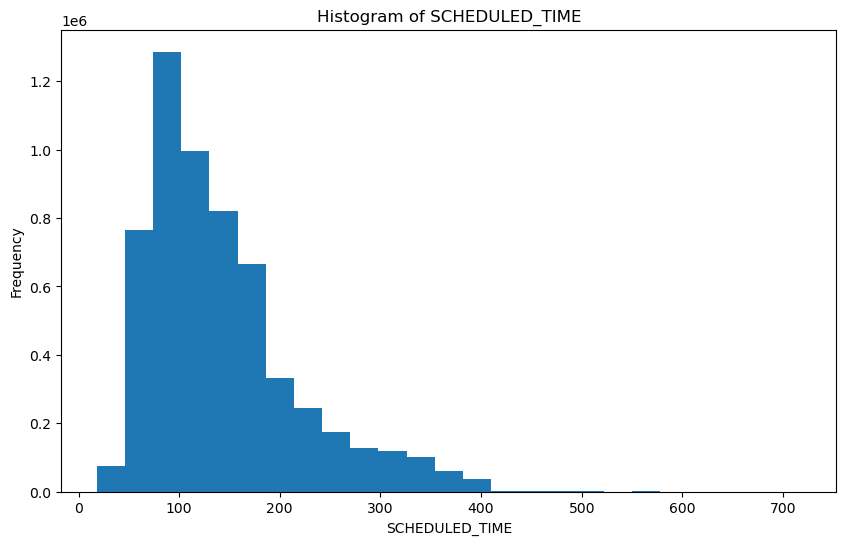

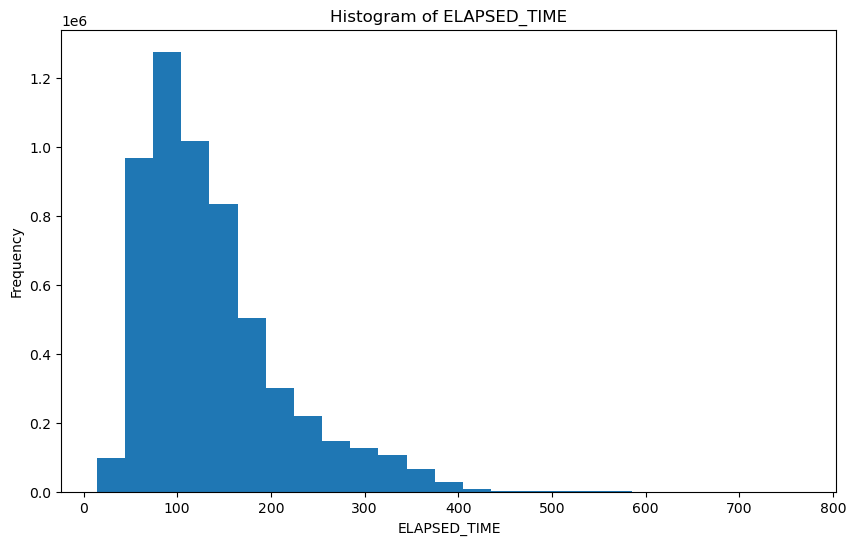

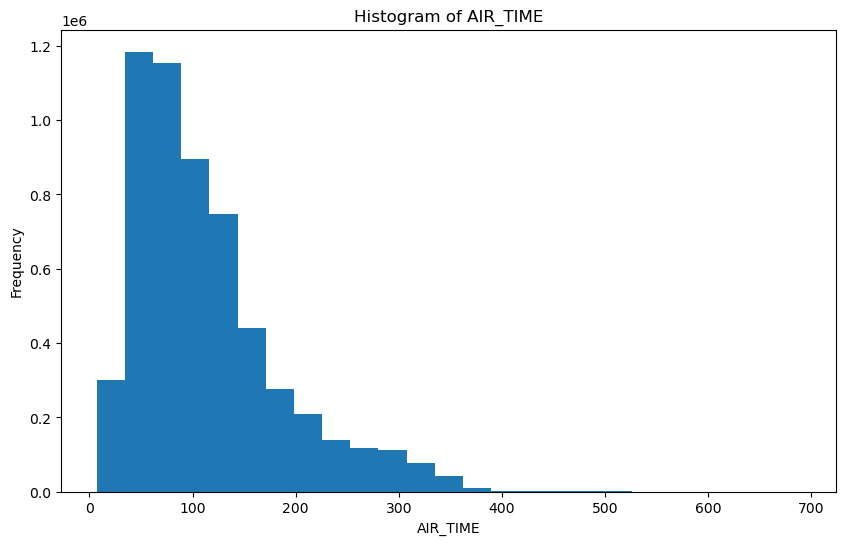

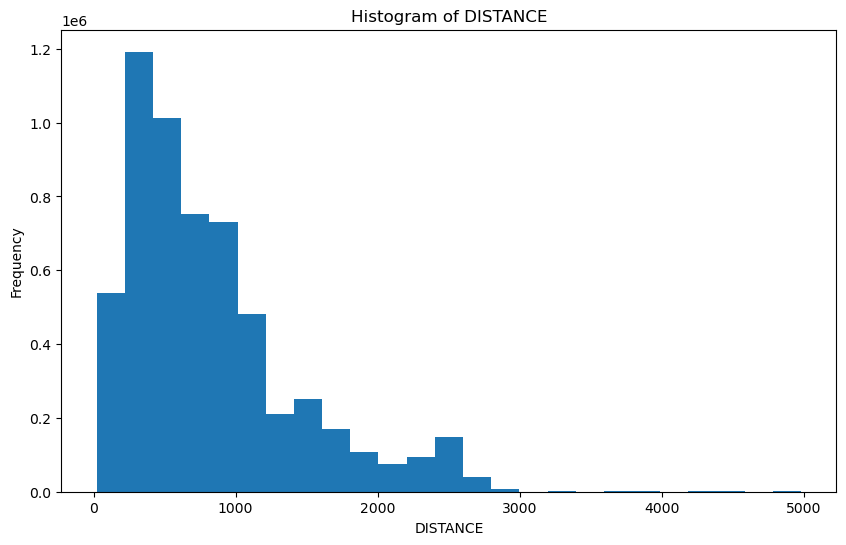

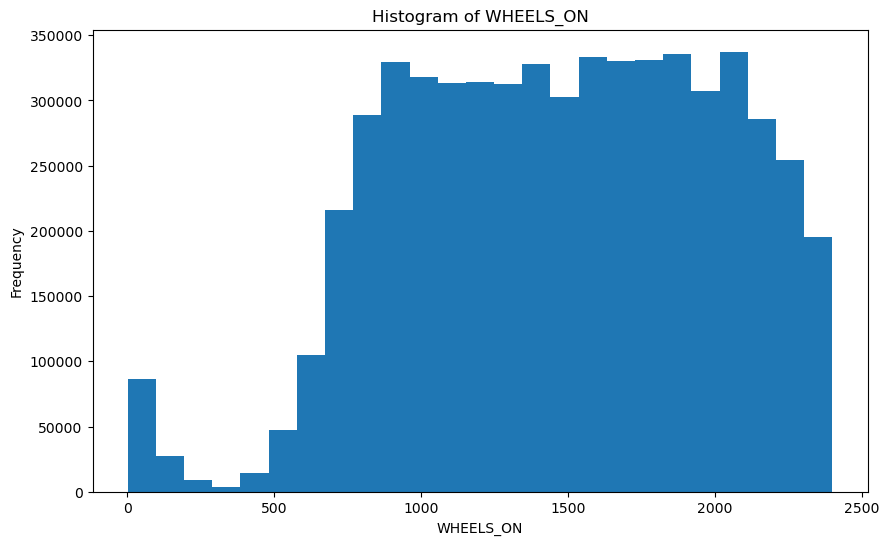

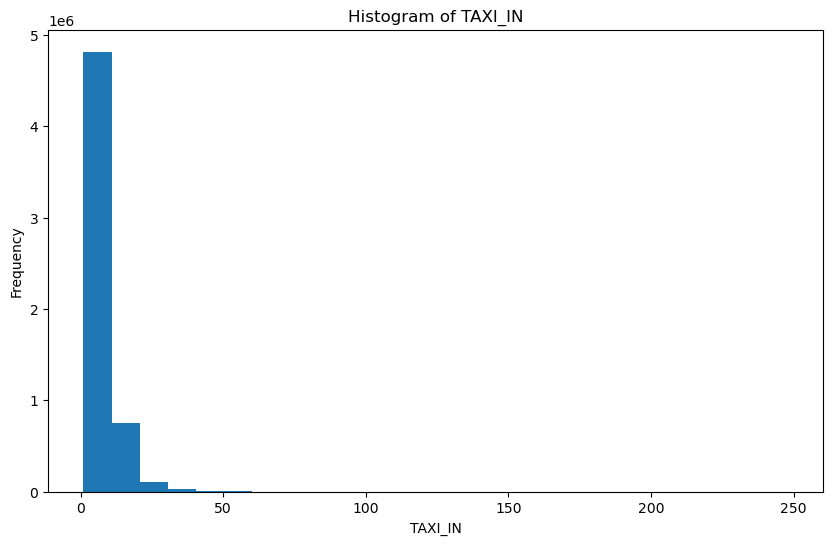

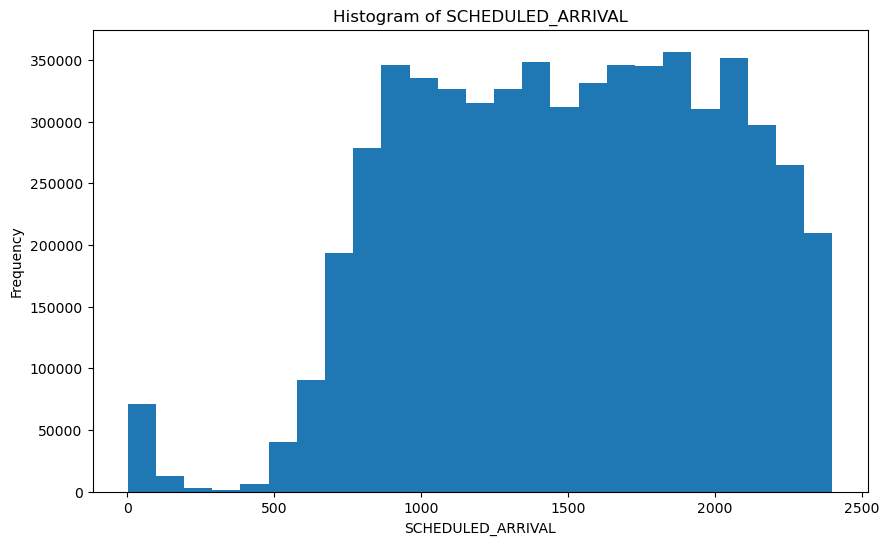

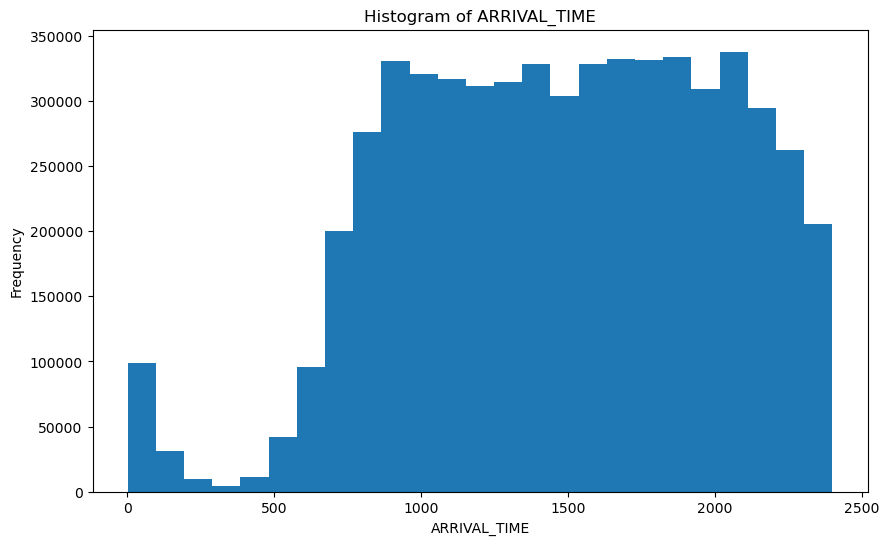

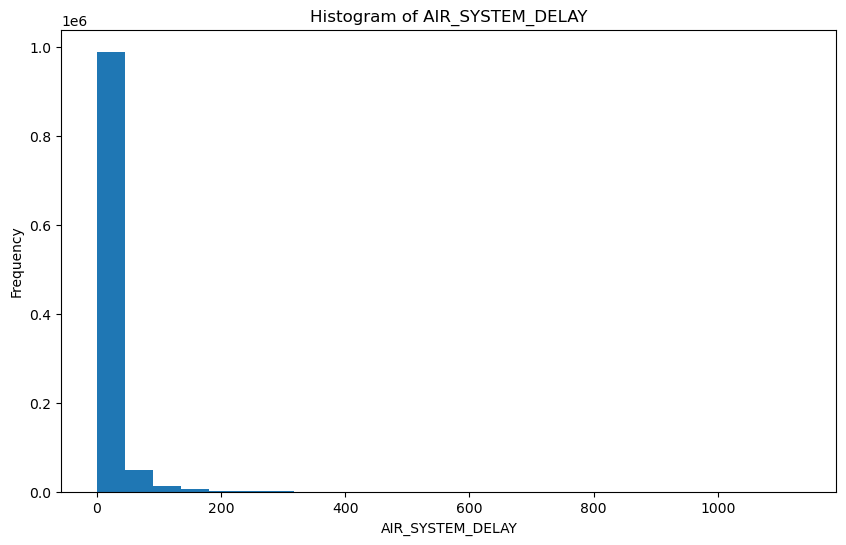

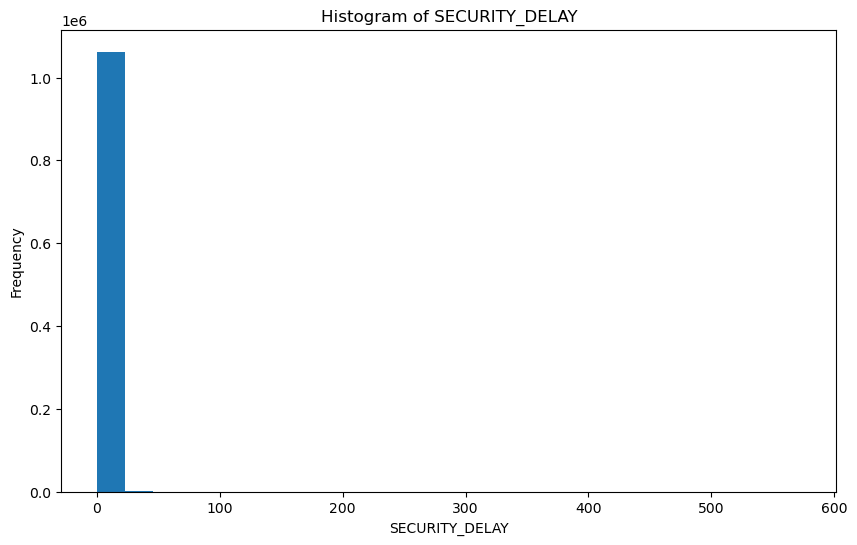

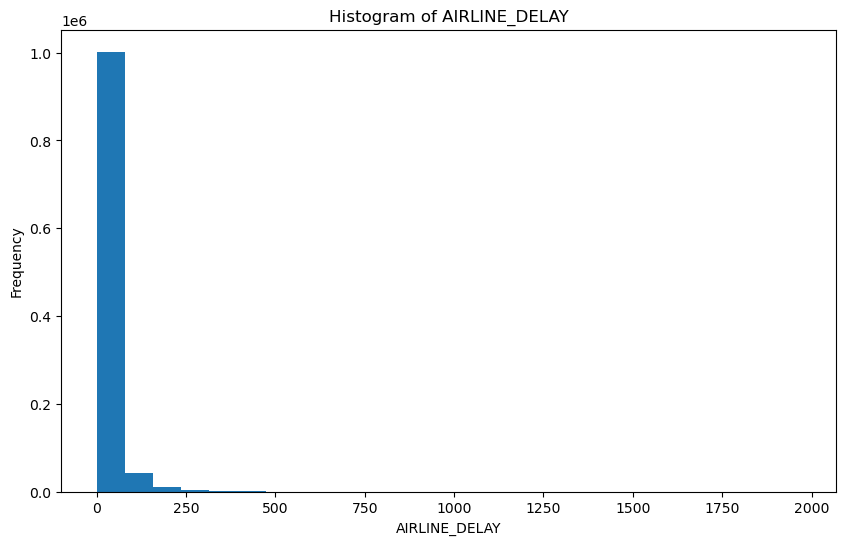

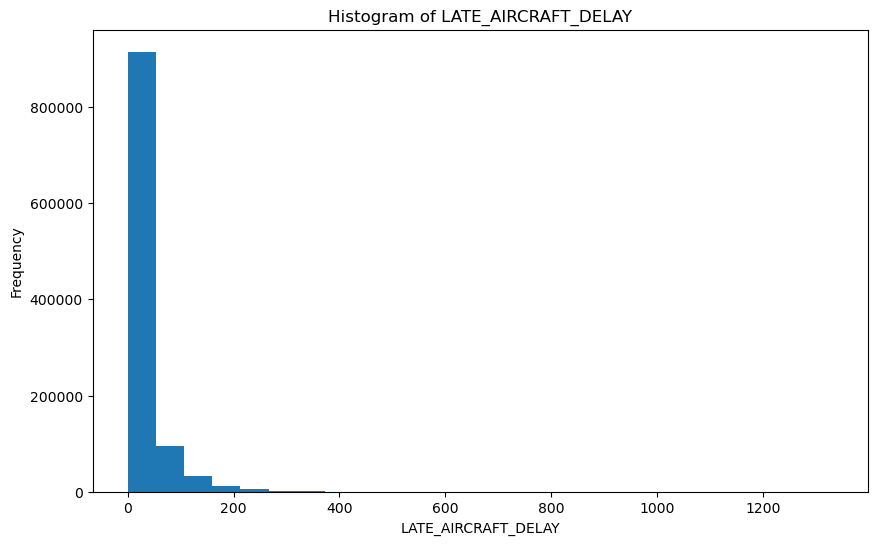

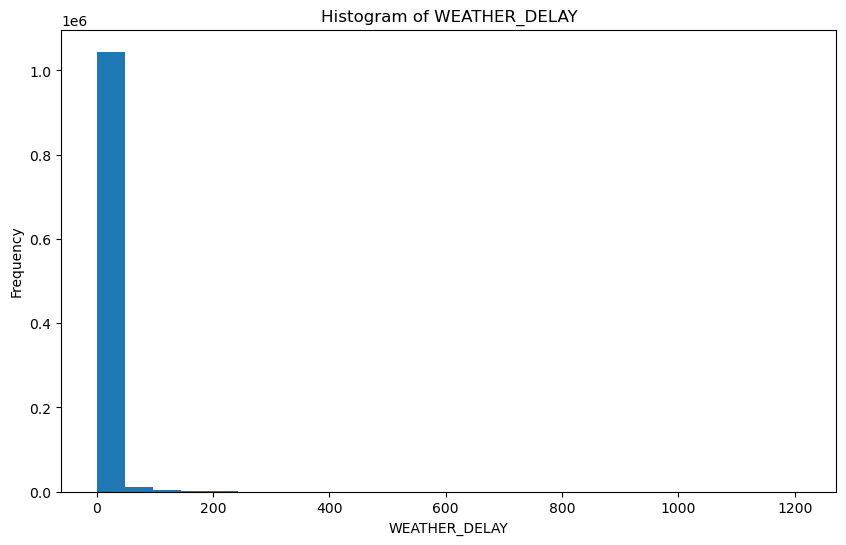

In [7]:
continuous_columns = ['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
for column in continuous_columns:
    plt.figure(figsize=(10,6))
    plt.hist(flights[column].drop_nulls(), bins=25)
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()
# logspace, feature engineering

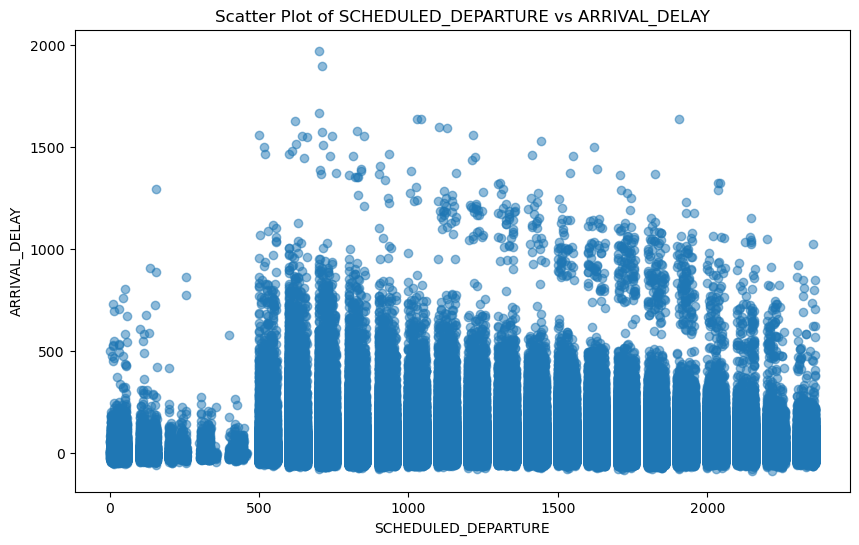

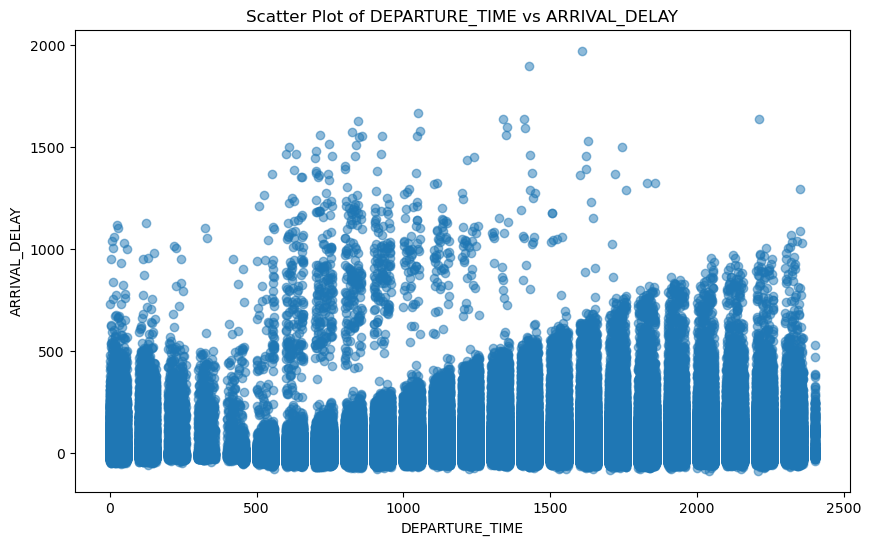

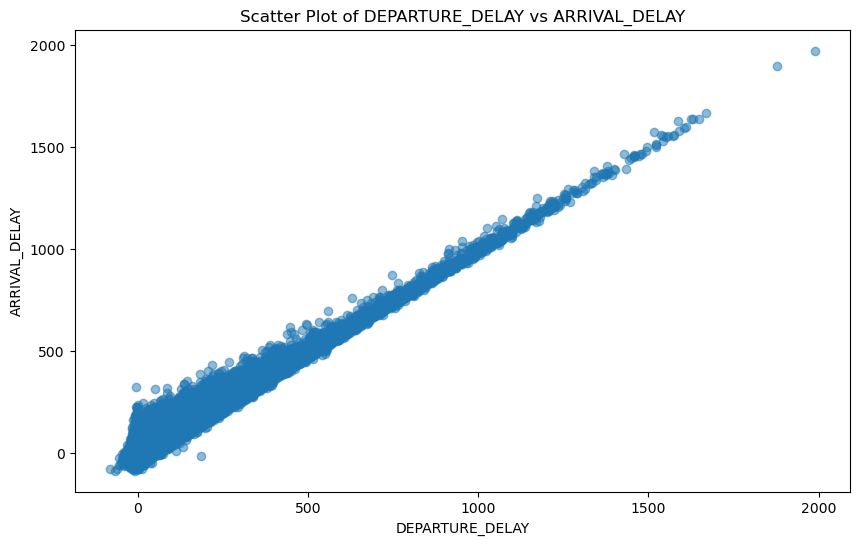

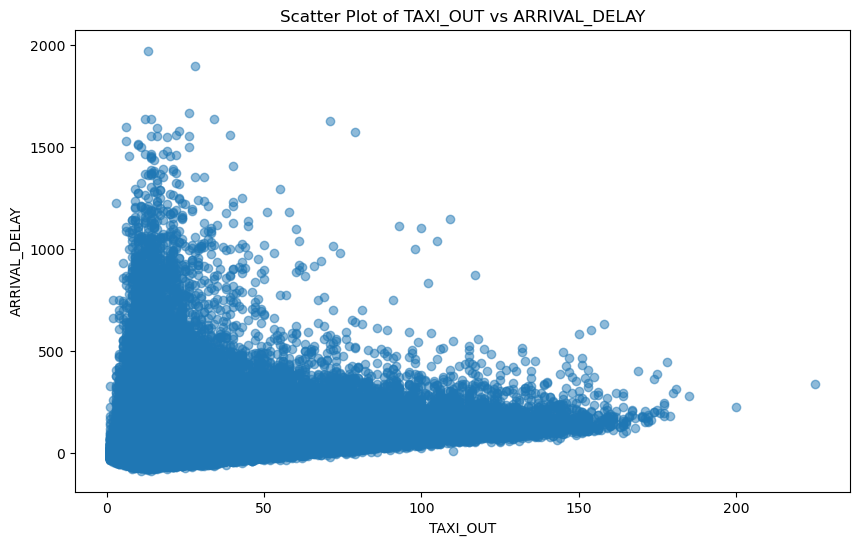

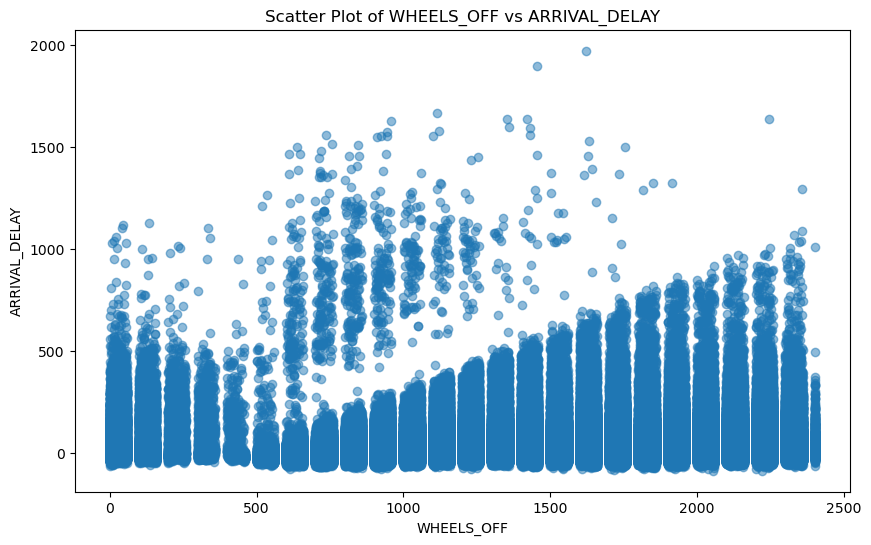

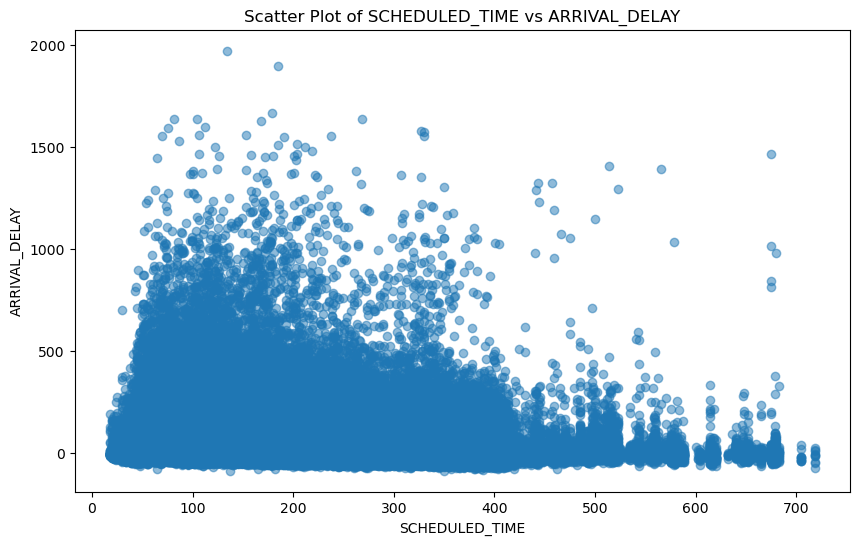

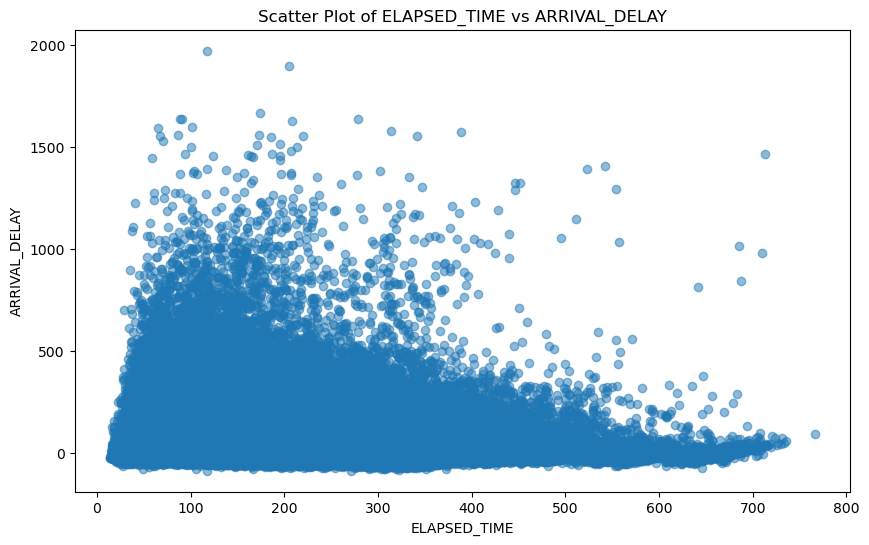

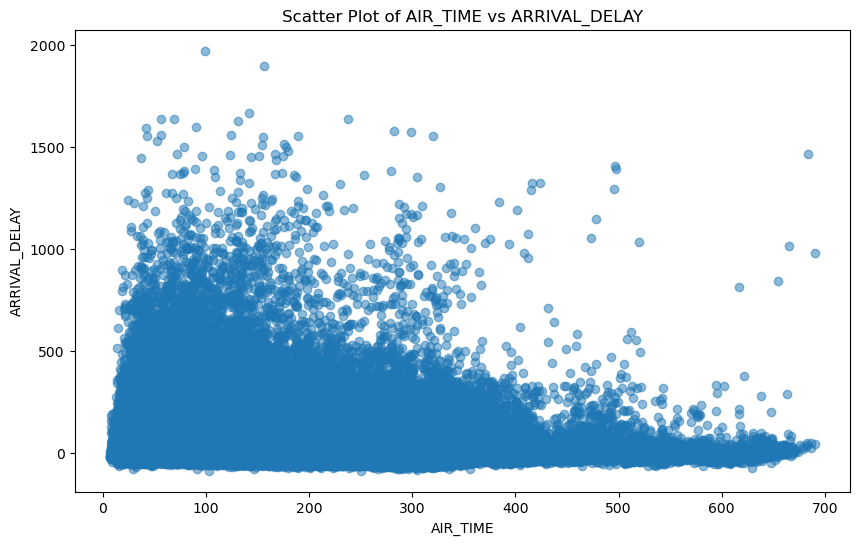

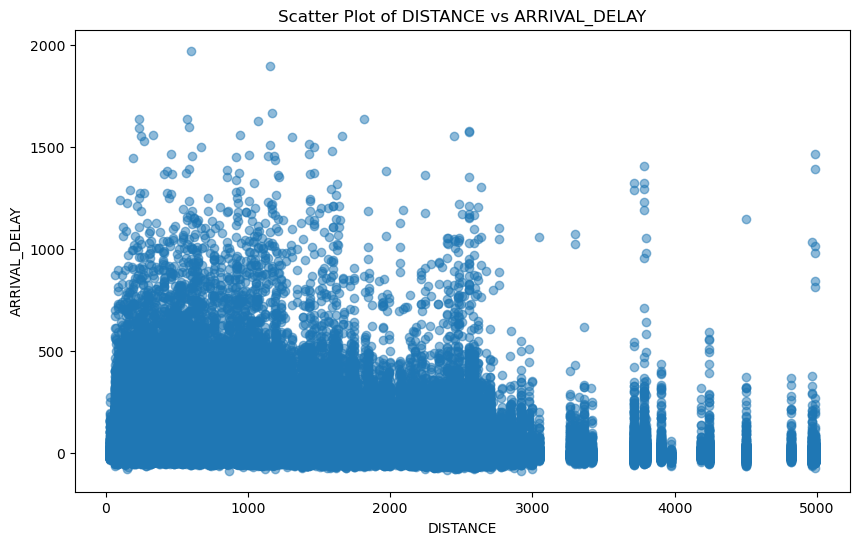

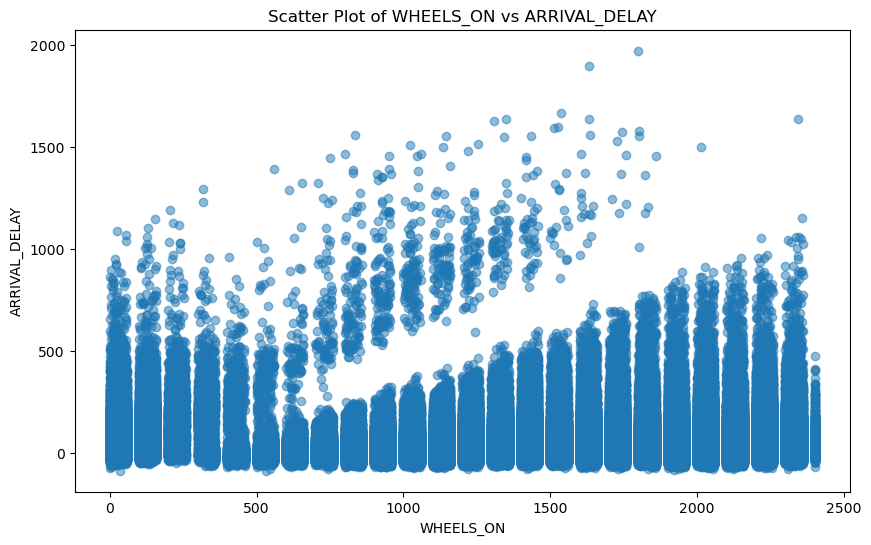

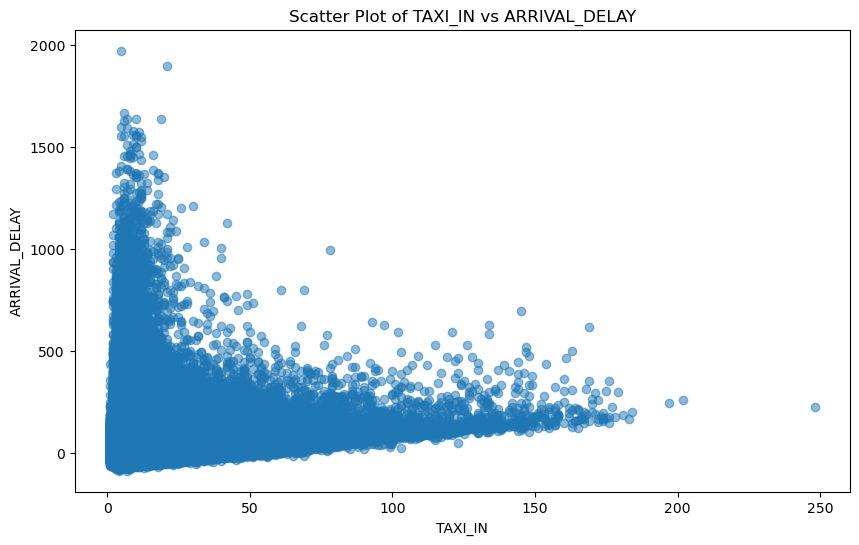

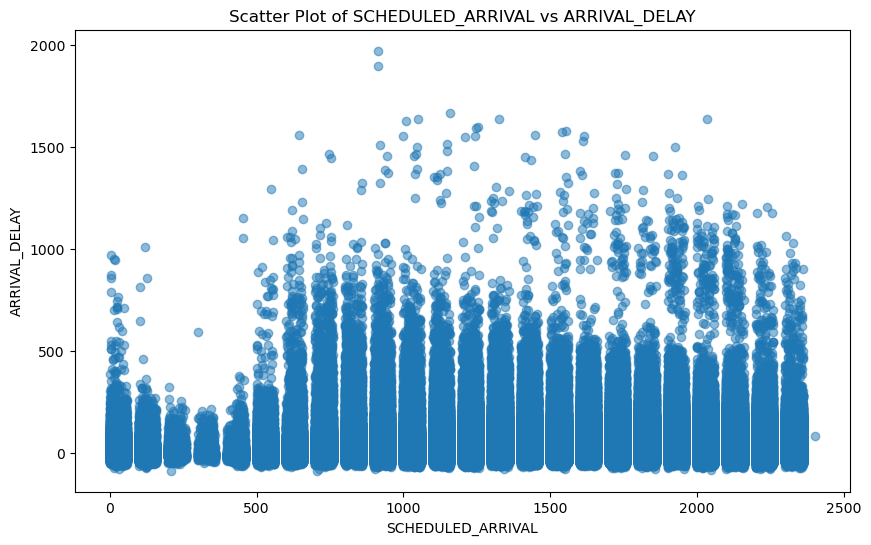

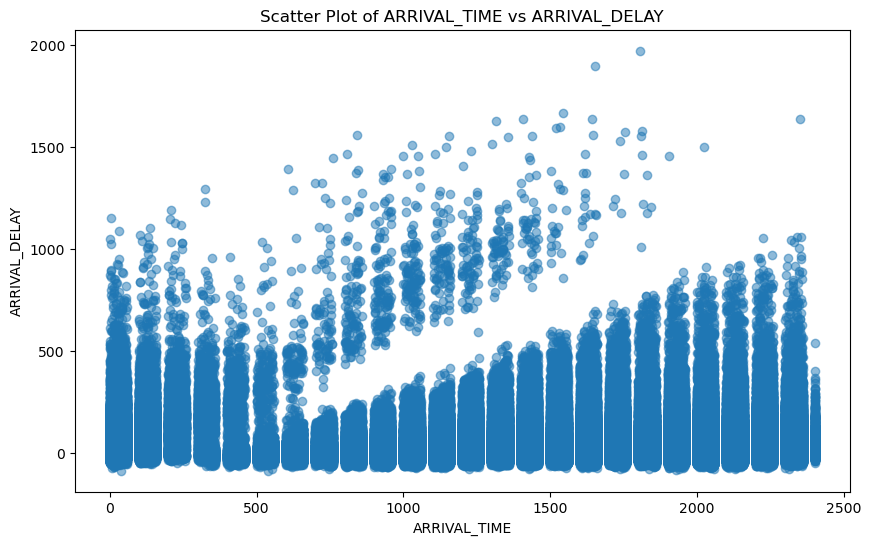

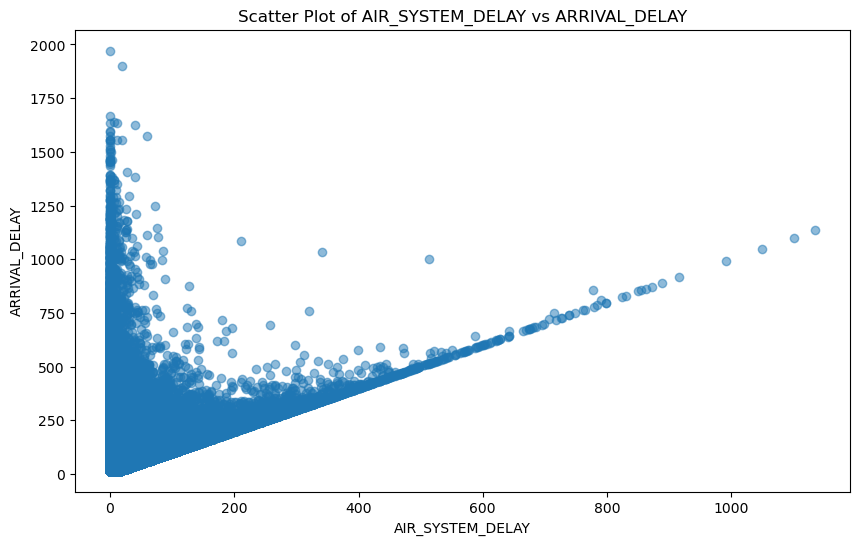

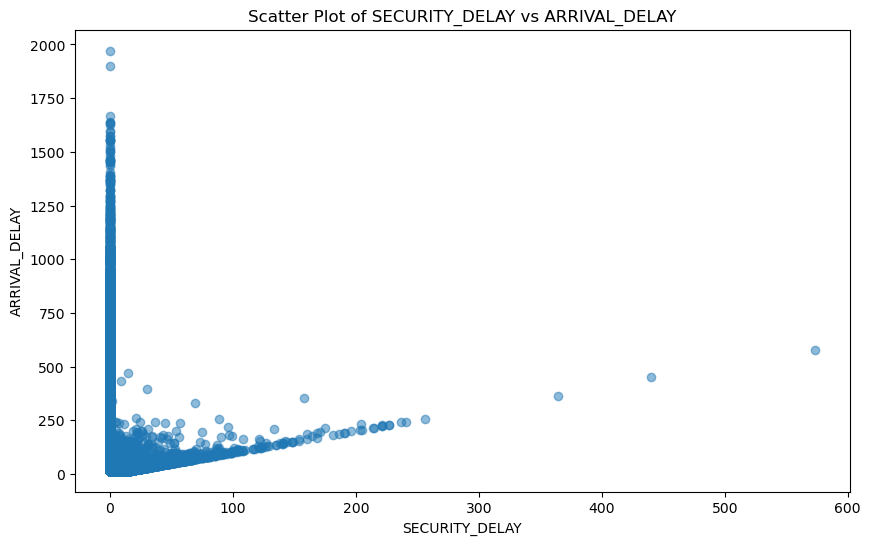

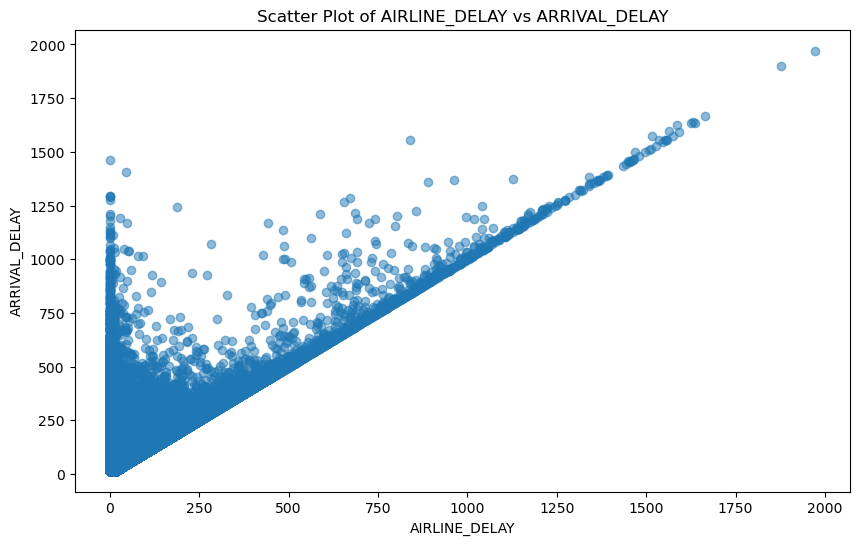

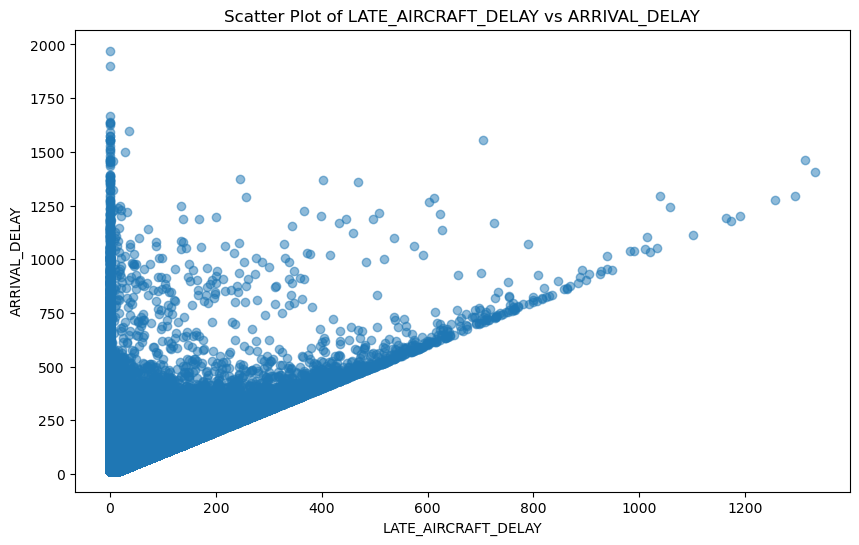

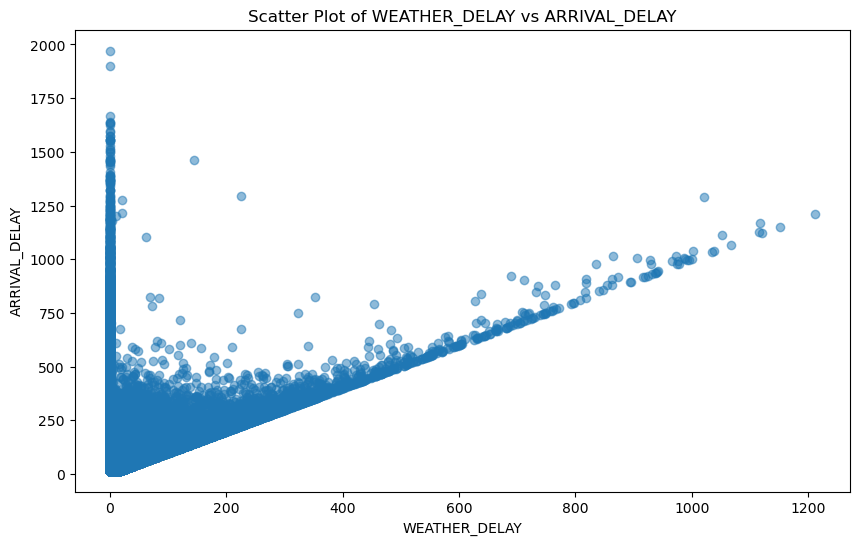

In [8]:
for column in continuous_columns:
    plt.figure(figsize=(10,6))
    plt.scatter(flights[column].filter(y.is_not_null()), y.drop_nulls(), alpha=0.5)
    plt.xlabel(f'{column}')
    plt.ylabel('ARRIVAL_DELAY')
    plt.title(f'Scatter Plot of {column} vs ARRIVAL_DELAY')
    plt.show()

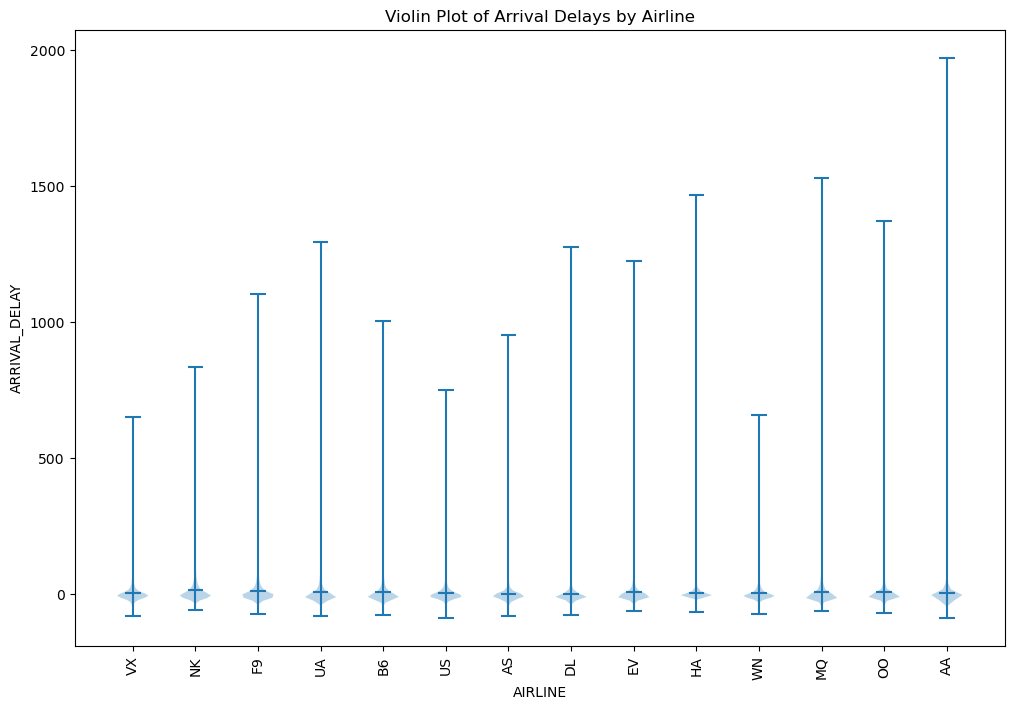

In [9]:
plt.figure(figsize=(12,8))
airline_delays = []
airlines = flights['AIRLINE'].unique().to_list()
for airline in airlines:
    delays = y.filter(flights['AIRLINE'] == airline).drop_nulls().to_list()
    airline_delays.append(delays)
plt.violinplot(airline_delays, showmeans=True)
plt.xticks(ticks=np.arange(1, len(airlines)+1), labels=airlines, rotation=90)
plt.xlabel('AIRLINE')
plt.ylabel('ARRIVAL_DELAY')
plt.title('Violin Plot of Arrival Delays by Airline')
plt.show()

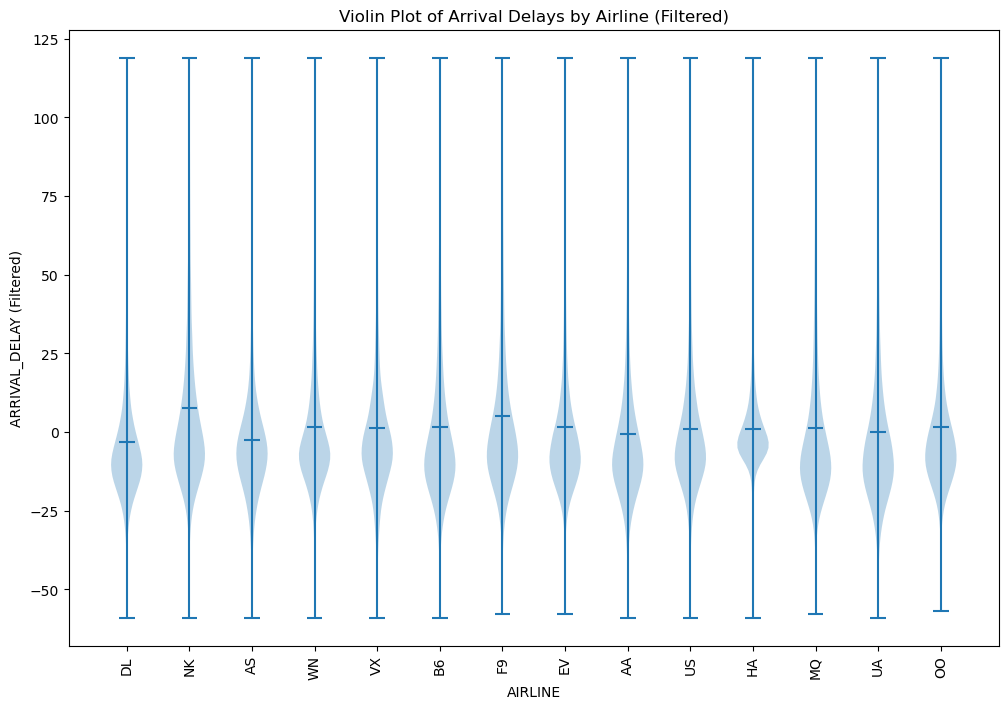

In [10]:
plt.figure(figsize=(12,8))
airline_delays = []
airlines = flights['AIRLINE'].unique().to_list()
for airline in airlines:
    delays = y.filter((flights['AIRLINE'] == airline) & (y > -60) & (y < 120)).drop_nulls().to_list()
    airline_delays.append(delays)
plt.violinplot(airline_delays, showmeans=True)
plt.xticks(ticks=np.arange(1, len(airlines)+1), labels=airlines, rotation=90)
plt.xlabel('AIRLINE')
plt.ylabel('ARRIVAL_DELAY (Filtered)')
plt.title('Violin Plot of Arrival Delays by Airline (Filtered)')
plt.show()

In [11]:
# drop all rows where ARRIVAL_DELAY is null
X_old = X
y_old = y
X = X.filter(y.is_not_null())
y = y.drop_nulls()
# fraction of rows dropped
rows_dropped = X_old.height - X.height
print(f"Rows dropped due to null ARRIVAL_DELAY: {rows_dropped} ({rows_dropped / X_old.height:.2%})")


Rows dropped due to null ARRIVAL_DELAY: 105071 (1.81%)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [13]:
print(X_train.columns)
print(X_train.shape)
print(X_test.columns)
print(X_test.shape)
print(X_val.columns)
print(X_val.shape)
print(y_train.describe())
print(y_test.describe())
print(y_val.describe())

['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
(3428404, 30)
['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
(1142802, 30)
['YEAR', 'MONTH', 'DAY', 'DA

In [14]:
continuous_columns = ['DEPARTURE_DELAY', 'TAXI_OUT', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'TAXI_IN', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
temporal_columns = ['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME']

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select(continuous_columns).to_pandas())
X_test_scaled  = scaler.transform(X_test.select(continuous_columns).to_pandas())
X_val_scaled  = scaler.transform(X_val.select(continuous_columns).to_pandas())
X_train_scaled = pd.DataFrame(X_train_scaled, columns=continuous_columns)
X_train_scaled = pl.from_pandas(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=continuous_columns)
X_test_scaled = pl.from_pandas(X_test_scaled)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=continuous_columns)
X_val_scaled = pl.from_pandas(X_val_scaled)
X_train = X_train.drop(continuous_columns).hstack(X_train_scaled)
X_test = X_test.drop(continuous_columns).hstack(X_test_scaled)
X_val = X_val.drop(continuous_columns).hstack(X_val_scaled)

In [16]:
minmax = MinMaxScaler()
X_train_minmax = minmax.fit_transform(X_train.select(temporal_columns).to_pandas())
X_test_minmax  = minmax.transform(X_test.select(temporal_columns).to_pandas())
X_val_minmax  = minmax.transform(X_val.select(temporal_columns).to_pandas())
X_train_minmax = pd.DataFrame(X_train_minmax, columns=temporal_columns)
X_train_minmax = pl.from_pandas(X_train_minmax)
X_test_minmax = pd.DataFrame(X_test_minmax, columns=temporal_columns)
X_test_minmax = pl.from_pandas(X_test_minmax)
X_val_minmax = pd.DataFrame(X_val_minmax, columns=temporal_columns)
X_val_minmax = pl.from_pandas(X_val_minmax)
X_train = X_train.drop(temporal_columns).hstack(X_train_minmax)
X_test = X_test.drop(temporal_columns).hstack(X_test_minmax)
X_val = X_val.drop(temporal_columns).hstack(X_val_minmax)

In [17]:
# Too many airports, so we need to limit to top 20 most frequent, and group the rest as "Other"
for col in ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']:
    top20 = X_train[col].value_counts().sort(by='count', descending=True).head(20)[col].to_list()
    
    X_train = X_train.with_columns(
        pl.when(pl.col(col).cast(pl.Utf8).is_in(top20))
          .then(pl.col(col).cast(pl.Utf8))
          .otherwise(pl.lit("Other"))
          .alias(col)
    )
    X_test = X_test.with_columns(
        pl.when(pl.col(col).cast(pl.Utf8).is_in(top20))
          .then(pl.col(col).cast(pl.Utf8))
          .otherwise(pl.lit("Other"))
          .alias(col)
    )
    X_val = X_val.with_columns(
        pl.when(pl.col(col).cast(pl.Utf8).is_in(top20))
          .then(pl.col(col).cast(pl.Utf8))
          .otherwise(pl.lit("Other"))
          .alias(col)
    )

In [18]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_cat = ohe.fit_transform(X_train.select(categorical_columns).to_pandas())
cat_cols_expanded = ohe.get_feature_names_out(categorical_columns)
X_test_cat  = ohe.transform(X_test.select(categorical_columns).to_pandas())
X_val_cat  = ohe.transform(X_val.select(categorical_columns).to_pandas())
X_train_cat = pd.DataFrame(X_train_cat, columns=cat_cols_expanded)
X_train_cat = pl.from_pandas(X_train_cat)
X_test_cat = pd.DataFrame(X_test_cat, columns=cat_cols_expanded)
X_test_cat = pl.from_pandas(X_test_cat)
X_val_cat = pd.DataFrame(X_val_cat, columns=cat_cols_expanded)
X_val_cat = pl.from_pandas(X_val_cat)
X_train = X_train.drop(categorical_columns).hstack(X_train_cat)
X_test = X_test.drop(categorical_columns).hstack(X_test_cat)
X_val = X_val.drop(categorical_columns).hstack(X_val_cat)

In [19]:
# how many missing values in each column now?
for column in X_train.columns:
    missing_count = X_train[column].is_null().sum()
    print(f"Column: {column}, Missing values in training set: {missing_count}")

Column: YEAR, Missing values in training set: 0
Column: MONTH, Missing values in training set: 0
Column: DAY, Missing values in training set: 0
Column: DAY_OF_WEEK, Missing values in training set: 0
Column: FLIGHT_NUMBER, Missing values in training set: 0
Column: TAIL_NUMBER, Missing values in training set: 0
Column: CANCELLATION_REASON, Missing values in training set: 3428404
Column: DEPARTURE_DELAY, Missing values in training set: 0
Column: TAXI_OUT, Missing values in training set: 0
Column: SCHEDULED_TIME, Missing values in training set: 0
Column: ELAPSED_TIME, Missing values in training set: 0
Column: AIR_TIME, Missing values in training set: 0
Column: DISTANCE, Missing values in training set: 0
Column: TAXI_IN, Missing values in training set: 0
Column: AIR_SYSTEM_DELAY, Missing values in training set: 2790825
Column: SECURITY_DELAY, Missing values in training set: 2790825
Column: AIRLINE_DELAY, Missing values in training set: 2790825
Column: LATE_AIRCRAFT_DELAY, Missing values in 

In [21]:
too_many_missing  = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
for column in too_many_missing:
    missing_count = X_train[column].is_null().sum()
    total_count = X_train.height
    print(f"Column: {column}, Missing values: {missing_count} ({missing_count / total_count:.2%})")
X_train = X_train.drop(too_many_missing)
X_test = X_test.drop(too_many_missing)
X_val = X_val.drop(too_many_missing)

Column: CANCELLATION_REASON, Missing values: 3428404 (100.00%)
Column: AIR_SYSTEM_DELAY, Missing values: 2790825 (81.40%)
Column: SECURITY_DELAY, Missing values: 2790825 (81.40%)
Column: AIRLINE_DELAY, Missing values: 2790825 (81.40%)
Column: LATE_AIRCRAFT_DELAY, Missing values: 2790825 (81.40%)
Column: WEATHER_DELAY, Missing values: 2790825 (81.40%)
